# **Interpretable Machine Learning for Car Ratings using Decision Trees**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [2]:
data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
print("Dataset shape", df.shape)

Dataset shape (1728, 7)


In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Display unique values and counts for each column

In [ ]:
for col in col_names:
    print(f"\nValue counts for column '{col}':")
    print(df[col].value_counts())


Value counts for column 'buying':
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value counts for column 'maint':
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value counts for column 'doors':
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Value counts for column 'persons':
persons
2       576
4       576
more    576
Name: count, dtype: int64

Value counts for column 'lug_boot':
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Value counts for column 'safety':
safety
low     576
med     576
high    576
Name: count, dtype: int64

Value counts for column 'class':
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


### EDA: Class Distribution

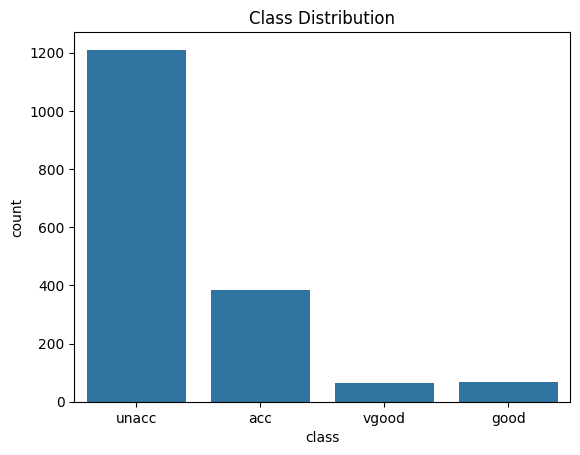

In [11]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

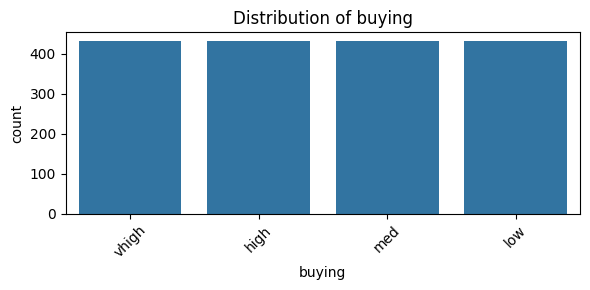

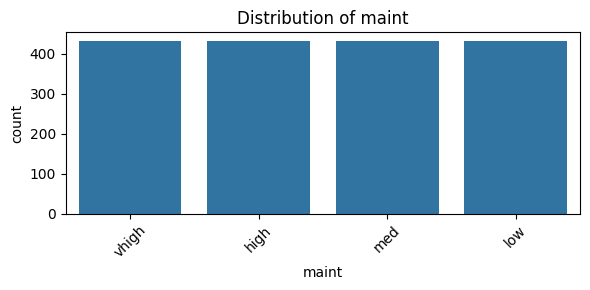

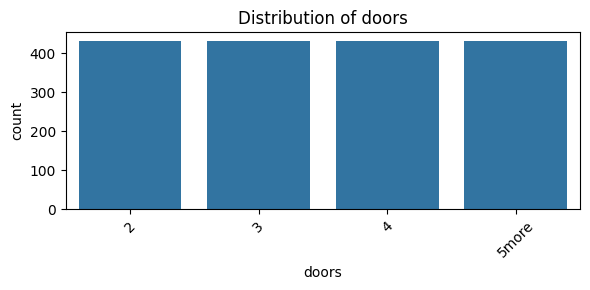

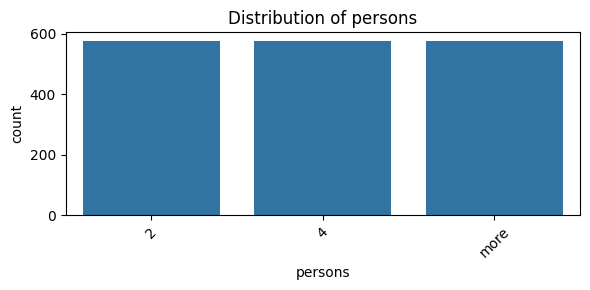

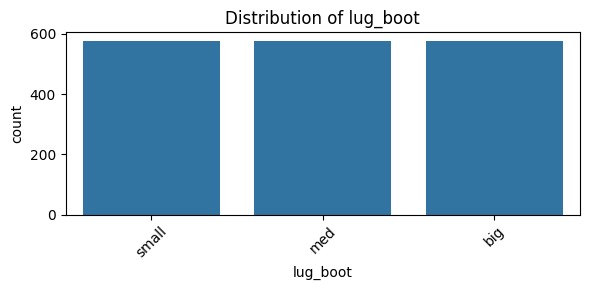

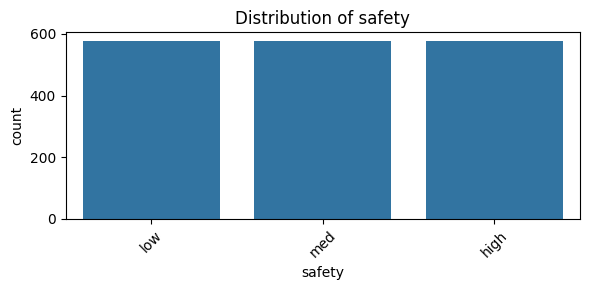

In [12]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### EDA: Stacked bar example (safety vs class)

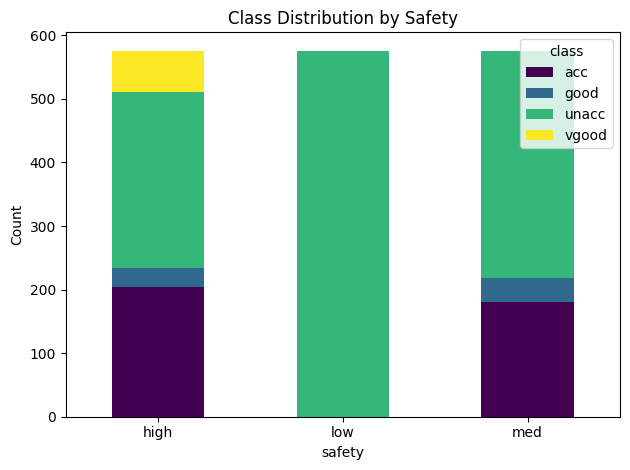

In [13]:
pd.crosstab(df['safety'], df['class']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Class Distribution by Safety')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Adding Teqnique for Synthetic Data Generation to Balance the "Class"

### Feature and target

In [14]:
X = df.drop(columns='class')
y = df['class']

### Store feature names before encoding

In [15]:
feature_names = X.columns.tolist()

### Balance the classes using RandomOverSampler

In [16]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
X_train.shape, X_test.shape

((3242, 6), (1598, 6))

In [19]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
4252,med,low,5more,more,med,high
4487,low,high,5more,more,med,high
3007,med,low,3,more,big,med
4430,low,low,5more,4,med,high
2316,vhigh,low,4,more,big,high


### Ordinal encoding

In [21]:
encoder = OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [22]:
X_train_enc

array([[2., 1., 3., 2., 1., 0.],
       [1., 0., 3., 2., 1., 0.],
       [2., 1., 1., 2., 0., 2.],
       ...,
       [1., 2., 3., 1., 1., 2.],
       [1., 0., 2., 2., 0., 0.],
       [0., 1., 3., 2., 1., 0.]])

In [23]:
X_test_enc

array([[2., 1., 3., 1., 1., 2.],
       [2., 3., 2., 2., 0., 2.],
       [2., 2., 1., 2., 1., 0.],
       ...,
       [0., 2., 1., 0., 1., 1.],
       [2., 0., 2., 1., 0., 2.],
       [1., 2., 1., 1., 2., 2.]])

### instantiate the DecisionTreeClassifier model with criterion gini index

In [25]:

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

### fit the model

In [26]:
clf_gini.fit(X_train_enc, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predictions

In [27]:
y_pred_gini = clf_gini.predict(X_test_enc)
y_pred_train_gini = clf_gini.predict(X_train_enc)

### Accuracy scores

In [28]:
print('Model accuracy score (Gini - test): {:.4f}'.format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {:.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))
print('Training set score: {:.4f}'.format(clf_gini.score(X_train_enc, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test_enc, y_test)))

Model accuracy score (Gini - test): 0.6765
Training-set accuracy score: 0.6635
Training set score: 0.6635
Test set score: 0.6765


### Classification Report

In [29]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gini))


Classification Report:

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       395
        good       0.51      0.90      0.65       381
       unacc       1.00      0.80      0.89       425
       vgood       0.68      1.00      0.81       397

    accuracy                           0.68      1598
   macro avg       0.55      0.68      0.59      1598
weighted avg       0.56      0.68      0.59      1598



### Confusion Matrix as Heatmap

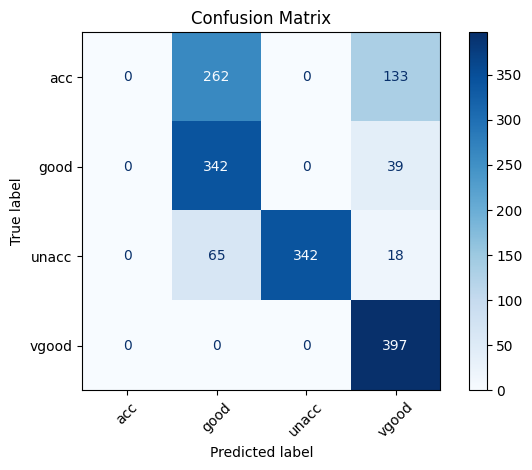

In [31]:
cm = confusion_matrix(y_test, y_pred_gini, labels=clf_gini.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Tree Visualization (Matplotlib)

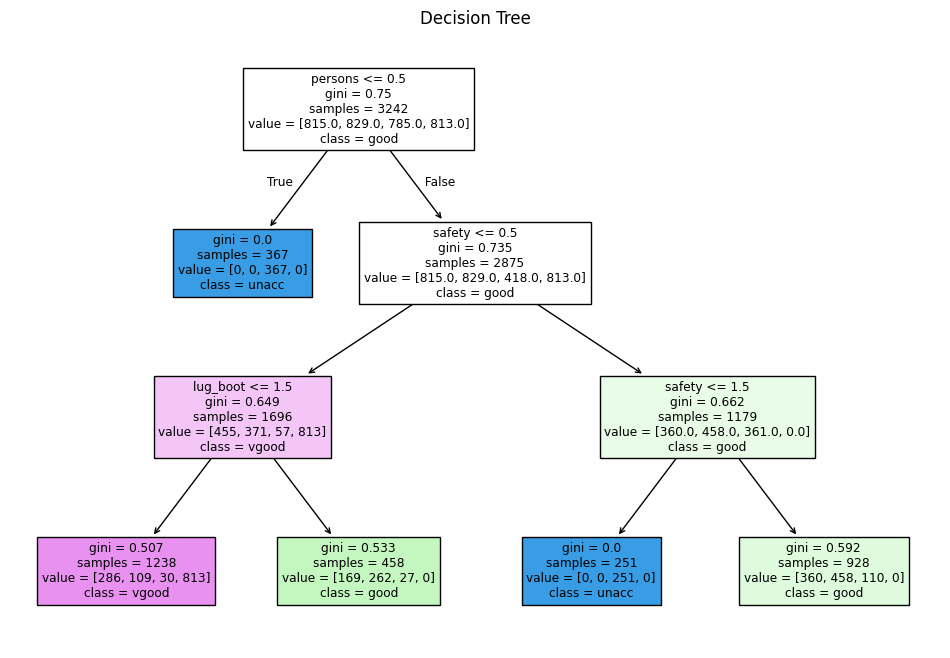

In [32]:
plt.figure(figsize=(12,8))
# tree.plot_tree(clf_gini.fit(X_train, y_train))
tree.plot_tree(clf_gini, feature_names=feature_names, class_names=clf_gini.classes_, filled=True)
plt.title("Decision Tree")
plt.show() 

### Graphviz visualization

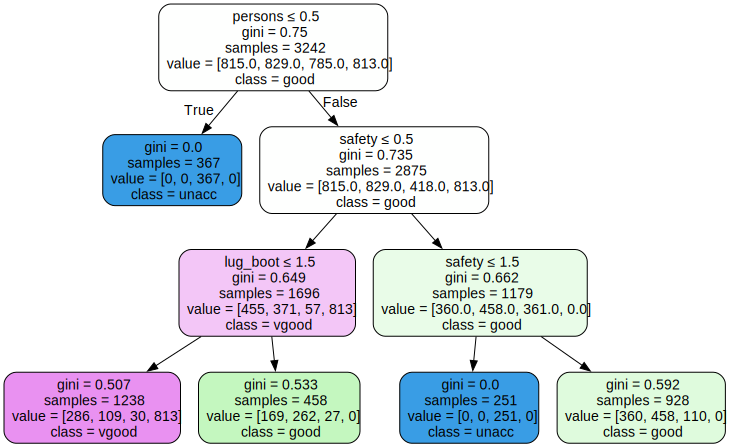

In [33]:
dot_data = export_graphviz(clf_gini, out_file=None, 
                           feature_names=feature_names,  
                           class_names=clf_gini.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

### Learning curve: accuracy vs tree depth

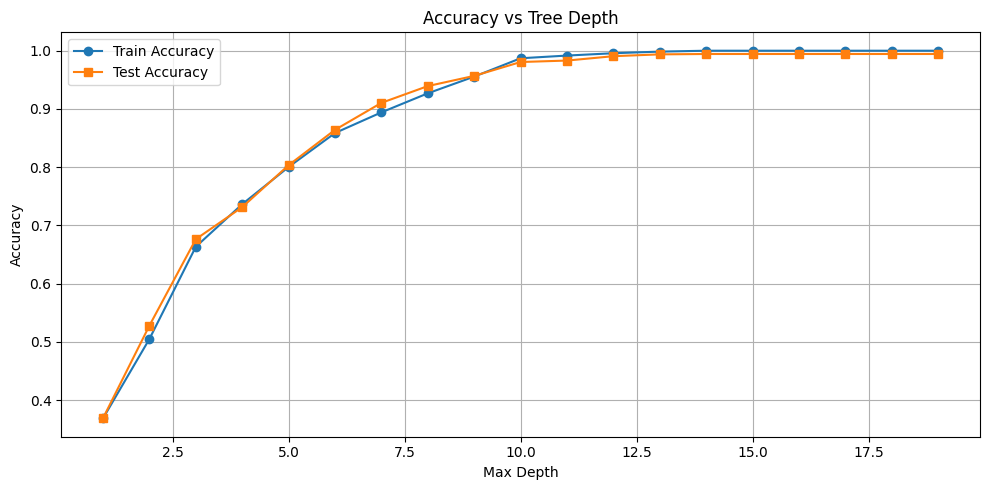

In [36]:
train_scores = []
test_scores = []
depth_range = range(1, 20)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_enc, y_train)
    train_scores.append(model.score(X_train_enc, y_train))
    test_scores.append(model.score(X_test_enc, y_test))

plt.figure(figsize=(10, 5))
plt.plot(depth_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(depth_range, test_scores, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()